# K Nearest Neighbors

# Importing Forge DataSet

In [26]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
#importing dataset created by the author
# generating dataset
X,y=mglearn.datasets.make_forge()

# k=1

When k=1 we can see the nearest neighbors of our new datapoint . We have three datapoints and each of them we marked the closet point in the training set , this will be the nearest neighbor.

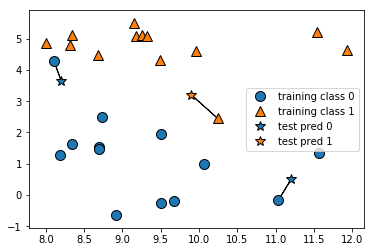

In [27]:
mglearn.plots.plot_knn_classification(n_neighbors=1) # setting the parameter as number of neighbor =1

The prediction of the one-nearest-neighbor alogorithm is the label of that point (shown by the color of the star).

# k=3

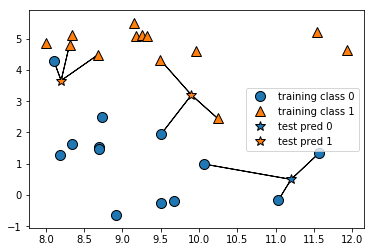

In [28]:
mglearn.plots.plot_knn_classification(n_neighbors=3) # number pf neighbors =3

# Applying kNN to forge data set and checking the accuracy of the model

# Splitting the data into training set and test set

In [29]:
from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

# Importing estimator class for kNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3) # we consider k=3

# Storing the dataset to make predictions

In [31]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

# Making predictions

In [32]:
print("The predictions  on test set are")
print(clf.predict(X_test))

The predictions  on test set are
[1 0 1 0 1 0 0]


# Checking the accuracy of our model

In [33]:
clf.score(X_test,y_test) # Almost 86% accurate

0.8571428571428571

In [34]:
clf.score(X_train,y_train)

0.94736842105263153

# ANALYZING KNeighborClassifier

### Visualizing Decision Boundaries

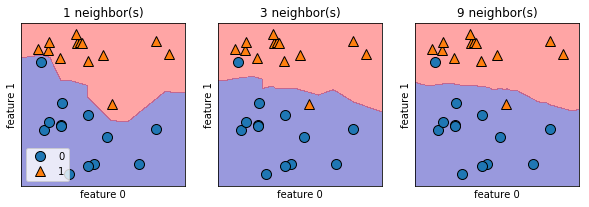

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

# Visualizing the train/test accuracy when we take different no of neighbors

## We will use breast cancer data

In [36]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

### train test split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)

In [38]:
training_accuracy=[]
testing_accuracy=[]
# try n_neighbors from 1 to 10
neighbors_settings=range(1,11)


In [39]:
for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    #record training set accuracy
    training_accuracy.append(clf.score(X_train,y_train))
    #record generalization accuracy
    testing_accuracy.append(clf.score(X_test,y_test))

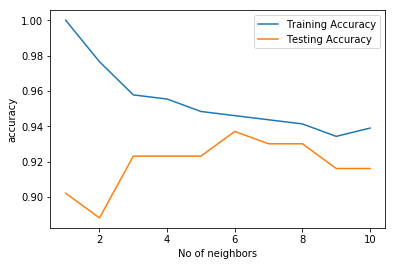

In [49]:
plt.plot(neighbors_settings,training_accuracy,label="Training Accuracy")
plt.plot(neighbors_settings,testing_accuracy,label="Testing Accuracy")
plt.xlabel("No of neighbors")
plt.ylabel("accuracy")
plt.legend()

# K neighbor Regression

## When k=1

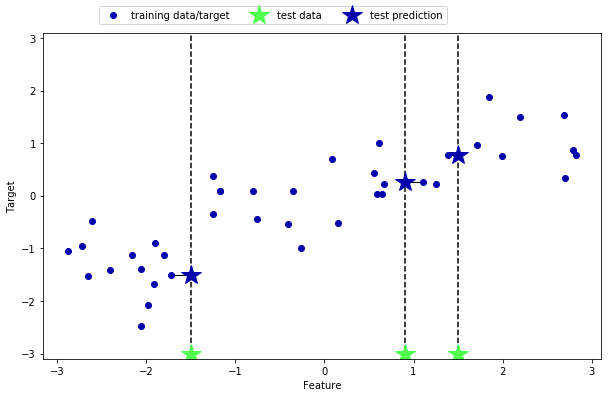

In [41]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

## k=3

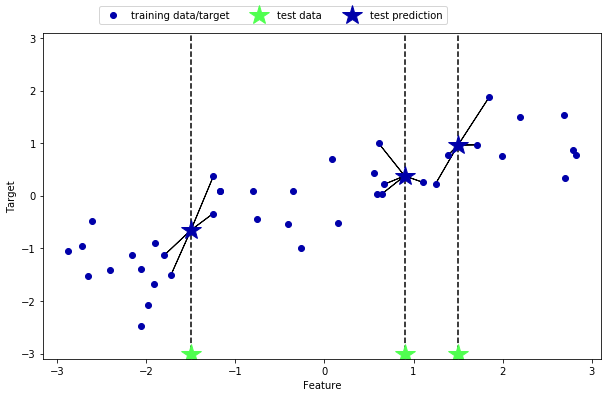

In [42]:
mglearn.plots.plot_knn_regression(n_neighbors=4)

## Implementing KNN algorithm for Regression 

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
X,y=mglearn.datasets.make_wave(n_samples=40)
# Splitting the dataset into training and testing datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [45]:
# Fitting the model and set number of neighbors = 3
reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [46]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

 ## Now checking the accuracy of the model

We will evaluate the model using score method,which for regressor returns the R^2 Score. More the value of R^2 better the prediction . 

In [47]:
reg.score(X_test,y_test)

0.83441724462496036

Here the R^2 value = 0.83 indicates a relatively good model fit

# ANALYZING KNeighborsRegressor

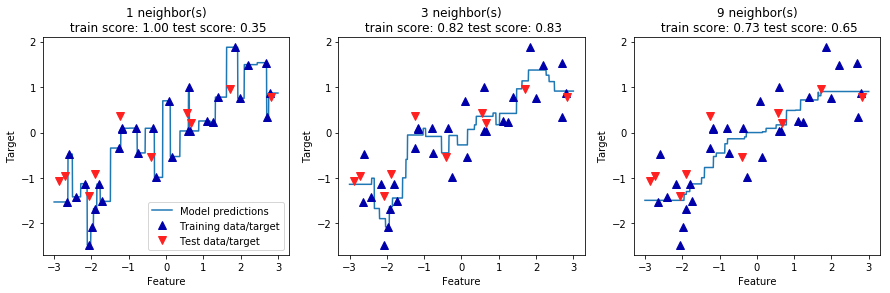

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")